# Solve nonlinear ODE BVP
> Low and Lou (1990) ODE for nonlinear force-free fields

In [ ]:
#| default_exp lowlou_ode

## Low-Lou ODE

Low and Lou (1990) create semi-analytical method to calculated "axisymmetric" nonlinear force-free fields.

$$\begin{cases}
\displaystyle (1-\mu^2)\frac{d^2 P}{d\mu^2} + n(n+1)P + a^2 \frac{1+n}{n}P^{1 + \frac{2}{n}} = 0 \\
\mu = \cos\theta \in [-1, 1] \\ 
P(-1) = 0 \\
P(1) = 0 \\
\\
P'(-1) = 10 \text{ for numerical normalization}
\end{cases}
$$

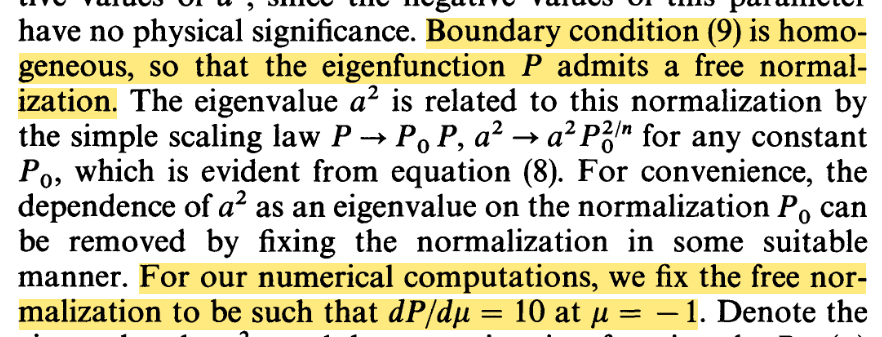

For fixed $n$, $a$ serves as a eignvalue for this homogenous BVP.

For $n=1$, we can list the positive eigenvalues in ascending order with $m=0, 1, 2, ...$. 

We denote a eigenvalue as $a^2 _{n, m}$ and the corresponding eigenfunction as $P_{n, m}$

For $n=1, m=0, 1, 2$, 

$$
\begin{align}
a^2 _{1, 0} &= 0 \\
a^2 _{1, 1} &= 0.425 \\
a^2 _{1, 2} &= 2.55 \\
\end{align}
$$

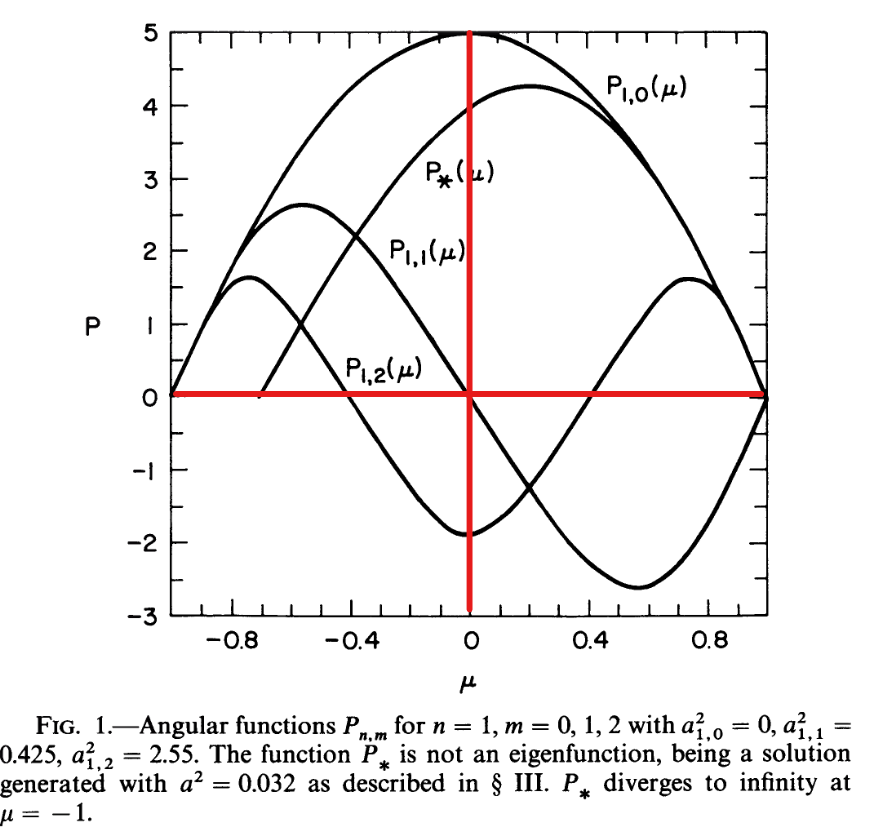

If you carefully see the above image, we can notice that

$$P_{1,0} (\mu) \sim \cos\left(\displaystyle\frac{\pi}{2} \mu\right)$$

$$P_{1,1} (\mu) \sim -\sin\left(\displaystyle\pi \mu\right)$$

$$P_{1,2} (\mu) \sim -\cos\left(\displaystyle\frac{3\pi}{2} \mu\right)$$

Then we can generally say that

For $m=0, 2$ (even $m$)

$$P_{1,m} (\mu) \sim \cos\left(\displaystyle\frac{(m + 1)\pi}{2} \mu\right)$$

For $m=1$ (odd $m$)
$$P_{1,m} (\mu) \sim \sin\left(\displaystyle\frac{(m + 1)\pi}{2} \mu\right)$$

This is the initial guess of the solution.

### Rewrite Low-Lou ODE using $\mathbf{S}(\mu)$

$$
(1-\mu^2)P'' + n(n+1)P + a^2 \frac{1+n}{n}P^{1 + \frac{2}{n}} = 0
$$

$$
\rightarrow P'' =  \frac{1}{1-\mu^2}\left[- n(n+1)P - a^2 \frac{1+n}{n}P^{1 + \frac{2}{n}}\right]
$$

$$
\rightarrow P'' =  \frac{-1}{1-\mu^2 + \epsilon}\left[n(n+1)P + a^2 \frac{1+n}{n}P^{1 + \frac{2}{n}}\right]
$$

where $\epsilon = 10^{-6}$ for numerical stability.

Target `y`
$$
\mathbf{S}(\mu) = \begin{bmatrix}
                     P(\mu) \\
                     P'(\mu)
                 \end{bmatrix}
              = \begin{bmatrix}
                     y[0] \\
                     y[1]
                 \end{bmatrix}
$$

ODE system `F(x, y)`
$$
\frac{d\mathbf{S}}{d\mu} = \mathbf{F}(\mu, \mathbf{S}(\mu)) 
                         = \begin{bmatrix}
                             P'(\mu) \\
                             P''(\mu)
                           \end{bmatrix}
                         = \begin{bmatrix}
                             y[1] \\
                            \displaystyle \frac{-1}{1-\mu^2 + \epsilon}\left[n(n+1)P + a^2 \frac{1+n}{n}P^{1 + \frac{2}{n}}\right]
                           \end{bmatrix}   
$$

$$\begin{cases}
\mu = \cos\theta \in [-1, 1] \\ 
P(-1) = 0 \\
P(1) = 0 \\
\end{cases}
$$

$$
P'(-1) = 10
$$

Domain

```python
mu_span = [-1, 1]
N = 100 # number of points
mu = np.linspace(mu_span[0], mu_span[1], N)
```

Boundary condition function `bc` defined from `ya`, `yb`

$$
\text{ya} = \mathbf{S}(-1) = \begin{bmatrix}
                                 P(-1) \\
                                 P'(-1)
                             \end{bmatrix}
                          = \begin{bmatrix}
                                 0 \\
                                 10
                             \end{bmatrix}
                          = \begin{bmatrix}
                                 \text{ya}[0] \\
                                 \text{ya}[1]
                             \end{bmatrix}
$$

$$
\text{yb} = \mathbf{S}(1) = \begin{bmatrix}
                                 P(1) \\
                                 P'(1)
                             \end{bmatrix}
                            = \begin{bmatrix}
                                 0 \\
                                 ?
                              \end{bmatrix}
                            = \begin{bmatrix}
                                 \text{yb}[0] \\
                                 \text{yb}[1]
                              \end{bmatrix}
$$

$$
\text{bc} = \begin{bmatrix}
                 \text{ya} - \mathbf{S}(-1) \\
                 \text{yb} - \mathbf{S}(1)
            \end{bmatrix}
          = \begin{bmatrix}
                 \text{ya}[0] - 0 \\
                 \text{ya}[1] - 10 \\
                 \text{yb}[0] - 0
            \end{bmatrix}
          = \begin{bmatrix}
                 \text{ya}[0] \\
                 \text{ya}[1] - 10\\
                 \text{yb}[0]
            \end{bmatrix}
$$

Initial guess `y0`

For the given spacing `h`, 

$$
\begin{align}
\text{y0} & = [\mathbf{S}(-1), \mathbf{S}(-1 + h), \mathbf{S}(-1 + 2h), \cdots, \mathbf{S}(1)] \\
          & = \begin{bmatrix}
                  P(\mu=-1) & P(\mu=-1+h) & P(\mu=-1+2h) & \cdots & P(\mu=1) \\ 
                  P'(\mu=-1) & P'(\mu=-1+h) & P'(\mu=-1+2h) & \cdots & P'(\mu=1) \\ 
               \end{bmatrix}
\end{align}
$$

For $m=0, 2$ (even $m$)

$$P_{1,m} (\mu) \sim \cos\left(\displaystyle\frac{(m + 1)\pi}{2} \mu\right)$$

For $m=1$ (odd $m$)
$$P_{1,m} (\mu) \sim \sin\left(\displaystyle\frac{(m + 1)\pi}{2} \mu\right)$$

```python
if m % 2 == 0:
    P_init = np.cos(mu * (m + 1) * np.pi / 2)
else:
    P_init = np.sin(mu * (m + 1) * np.pi / 2)
```

Since $P'(-1) = 10$,

```python
dP_init = 10*np.ones_like(mu)
```

Then, together,

```python
S_init = np.vstack([P_init, dP_init])
```

In [ ]:
#| export
import numpy as np 
from scipy.integrate import solve_bvp

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
#| export
def find_P_and_a2(n, m):

    # ODE system
    # Define BVP (Low and Lou 1990)
    # a2 -> eigenvalue
    # S = [P, dP/dmu]
    # F = dSdmu
    # 
    # dP/dmu = 10 at mu = -1
    def F(x, y, p):
        mu = x
        P = y[0]
        dP = y[1]
        a2 = p[0]

        ddP = (-1)*(n*(n+1)*P + a2*((1+n)/n)*P**(1+2/n)) / (1-mu**2 + 1e-6)

        return [dP, ddP] 

    # Boundary Condition
    def bc(ya, yb, p):
        return [ya[0], ya[1]-10, yb[0]]

    # Domain
    mu_span = [-1, 1]
    N = 100
    mu = np.linspace(mu_span[0], mu_span[1], N)

    # Initial guess
    # For given m, use different initial guess
    if m % 2 == 0:
        P_guess = np.cos(mu * (m + 1) * np.pi / 2)
    else:
        P_guess = np.sin(mu * (m + 1) * np.pi / 2)

    # For initial guess of dP/dmu, just use BC value
    dP_guess = 10*np.ones_like(mu)

    y_guess = np.vstack([P_guess, dP_guess])

    # For each initial eigenvalue, solve the problem.
    # If it is successful, return that otherwise do not return.
    # np.vectorize -> for loop & return type : array
    @np.vectorize
    def solve_eigenvalue_problem(a2_0):
        sol = solve_bvp(F, bc, mu, y_guess, p=[a2_0], tol=1e-6)
        if sol.success == True:
            return sol
        else:
            return None 

    a2_0_list = np.linspace(0.0, 10.0, 100)

    results = solve_eigenvalue_problem(a2_0_list)
    eigenvalues = np.array([sol.p for sol in results if sol is not None])


     # round & unique value & sorting
    eigenvalues = np.sort(np.unique(np.round(eigenvalues, 4)))
    
    # The smallest value for given m is desired eigenvalue
    eigenvalue = eigenvalues[0]
    # If this eigenvalue is zero for nonzero m, choose the next big eigenvalue
    if m > 0:
        if not (eigenvalue > 0):
            eigenvalue = eigenvalues[1]

    # Solve again with that eigenvalue
    sol = solve_eigenvalue_problem([eigenvalue])[0]
    
    return sol.sol, sol.p[0]

<matplotlib.legend.Legend>

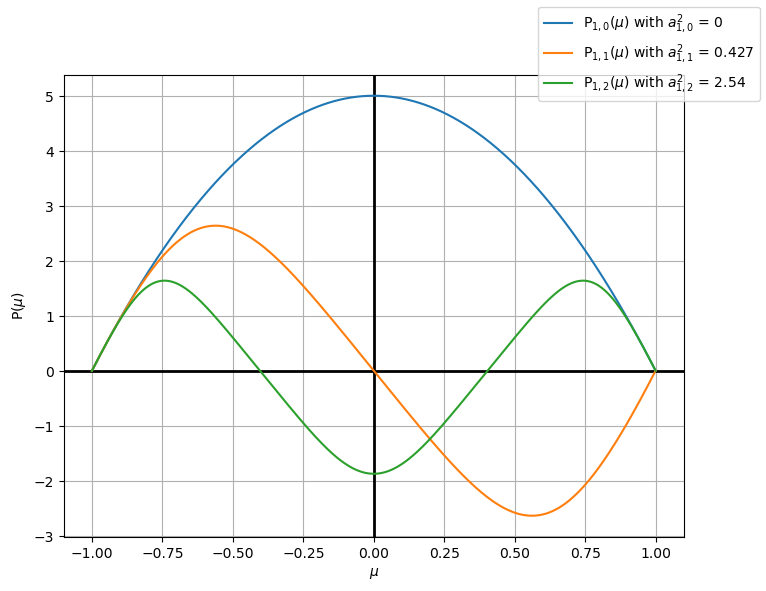

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(True)
ax.axhline(0, color='k', lw=2)
ax.axvline(0, color='k', lw=2)
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'P($\mu$)')

mu_plot = np.linspace(-1, 1, 1000)

n = 1
for m in [0, 1, 2]:
    
    S, a2 = find_P_and_a2(n, m)
    P_plot = S(mu_plot)[0]
    
    if a2 < 1e-3:
        P_label = 'P' r'$_{' f'{n}, {m}' r'}(\mu)$ with $a^2' r'_{' f'{n}, {m}' r'}$ = 0'
    else:
        P_label = 'P' r'$_{' f'{n}, {m}' r'}(\mu)$ with $a^2' r'_{' f'{n}, {m}' r'}$ = ' f'{a2:.3g}'
    ax.plot(mu_plot, P_plot, label=P_label)

fig.legend()

We can successfuly solve Low-Lou ODE for $n=1, m=0, 1, 2$

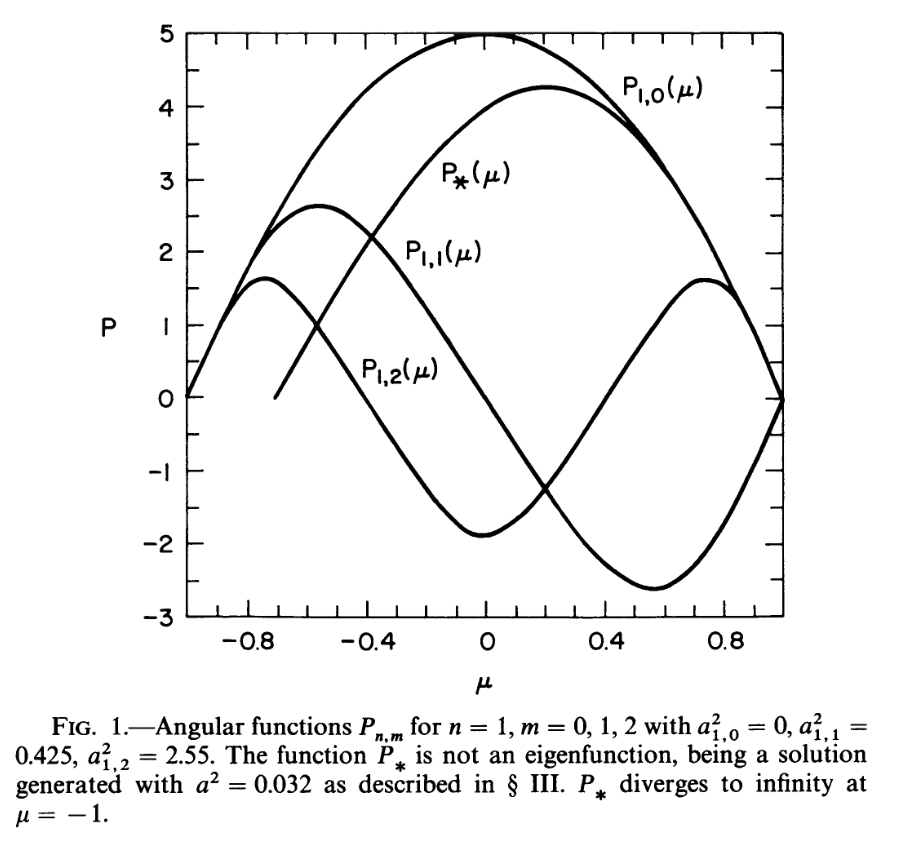